# Programming Project 1: Unigram Model

## Task 1: Model Training, Prediction & Evaluation

In [1]:
%matplotlib inline 

import math
import requests
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Read in files
train = requests.get("http://www.cs.tufts.edu/comp/136/HW/pp1files/training_data.txt").text
test = requests.get("http://www.cs.tufts.edu/comp/136/HW/pp1files/test_data.txt").text

# Split the data into a list of words
train_data = train.split()
test_data = test.split()

# Union the words in both the training set and the test set to build a dictionary
vocabulary1 = set(train_data)|set(test_data)
K = len(vocabulary1)
print K

9999


In [3]:
# Break up into 5 training sets of different sizes

N = len(train_data)
N1 = N/128
N2 = N/64
N3 = N/16
N4 = N/4
N5 = N

train_data_1 = train_data[0:N1]
train_data_2 = train_data[0:N2]
train_data_3 = train_data[0:N3]
train_data_4 = train_data[0:N4]
train_data_5 = train_data[0:N5]

In [4]:
# This function compute the Perplexity on the test set
# It takes in three arguments: test data, training data, and a vocabulary of K words
def compute_PP(test_data, train_data, vocabulary):

    N_train = len(train_data)
    N_test = len(test_data)
    K = len(vocabulary)
    
    # Learn the model using trainning data: 
    # For each word in dictionary, count the number of times it appears in the training set
    dictionary = dict.fromkeys(vocabulary,0)
    for word in train_data:
        dictionary[word] = dictionary[word] + 1
    
    
    # Compute the perplexity for each method 
    ml, ma, pd = 0, 0, 0
    for word in test_data:
        ml = ml + math.log(float(max(0.1, dictionary[word]))/N_train)
        ma = ma + math.log(float(dictionary[word] + 2 - 1)/(N_train + 2*K - K))
        pd = pd + math.log(float(dictionary[word] + 2)/(N_train + 2*K))
    
    PP_ML = math.exp(-1./N_test * ml)
    PP_MA = math.exp(-1./N_test * ma)
    PP_PD = math.exp(-1./N_test * pd)
    
    return [PP_ML, PP_MA, PP_PD]

In [5]:
# Train the data using 5 different training sets, and test on the test sets
row_1_test = compute_PP(test_data,train_data_1,vocabulary1)
row_2_test = compute_PP(test_data,train_data_2,vocabulary1)
row_3_test = compute_PP(test_data,train_data_3,vocabulary1)
row_4_test = compute_PP(test_data,train_data_4,vocabulary1)
row_5_test = compute_PP(test_data,train_data_5,vocabulary1)

In [6]:
# Build a dataframe to see the results
PP_test = [row_1_test, row_2_test, row_3_test, row_4_test, row_5_test]
df_test = pd.DataFrame(data = PP_test,index = ["set_1","set_2","set_3","set_4","set_5"], columns = ["ML","MAP","PD"])
df_test

,ML,MAP,PD
set_1,15379.936958,10106.876173,9812.377969
set_2,14573.991210,10004.357699,9677.335644
set_3,10182.801074,9338.596328,9191.114889
set_4,8855.383090,8800.537803,8779.915215
set_5,8612.346411,8609.536151,8607.971360


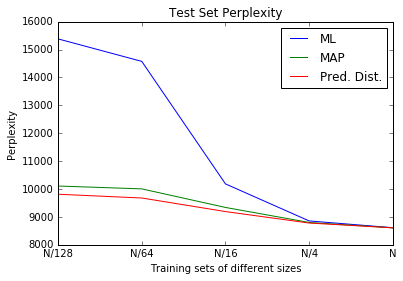

In [7]:
# Plotting
X = [1, 2, 3, 4, 5]
plt.plot(X,df_test["ML"],X,df_test["MAP"],X,df_test["PD"])
plt.ylim(8000,16000) #Limiting the range of y-axis
plt.xlabel("Training sets of different sizes")
plt.xticks(X, ["N/128","N/64","N/16","N/4","N"])
plt.ylabel("Perplexity")
plt.legend(["ML","MAP","Pred. Dist."])
plt.title("Test Set Perplexity")

In [8]:
# We repeat the above, but now test on training set itself
row_1_train = compute_PP(train_data,train_data_1,vocabulary1)
row_2_train = compute_PP(train_data,train_data_2,vocabulary1)
row_3_train = compute_PP(train_data,train_data_3,vocabulary1)
row_4_train = compute_PP(train_data,train_data_4,vocabulary1)
row_5_train = compute_PP(train_data,train_data_5,vocabulary1)

In [9]:
PP_train = [row_1_train, row_2_train, row_3_train, row_4_train, row_5_train]
df_train = pd.DataFrame(data = PP_train,index = ["set_1","set_2","set_3","set_4","set_5"], columns = ["ML","MAP","PD"])
df_train

,ML,MAP,PD
set_1,15156.908333,10054.372908,9780.274676
set_2,14361.469808,9940.460034,9635.287851
set_3,10010.163940,9235.069746,9110.065740
set_4,8704.362513,8667.212369,8657.737801
set_5,8476.454149,8477.001546,8478.501172


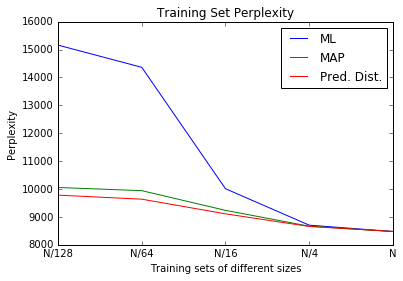

In [10]:
# Plotting
X = [1, 2, 3, 4, 5]
plt.plot(X,df_train["ML"],X,df_train["MAP"],X,df_train["PD"])
plt.ylim(8000,16000) #Limiting the range of y-axis
plt.xlabel("Training sets of different sizes")
plt.xticks(X, ["N/128","N/64","N/16","N/4","N"])
plt.ylabel("Perplexity")
plt.legend(["ML","MAP","Pred. Dist."])
plt.title("Training Set Perplexity")

### Discussion:

* **Q:** What happens to the test set perplexities of the different methods with respect to each other as the trainning set size increases? Please explain why this occurs.
   
   **A:** For each method, the test set perplexity decreases as the size of the trainning set increases. This is because our model is more accurate with larger training set. Perplexity is minimized when $p(w_i \mid \text{model}) \approx $ actual frequency of $w_i$ appears in all text, specifically in test set.


* **Q:** What is the obvious shortcoming of the maximum likelihood estimate for a unigram model? How do the other two approaches address this issue?

    **A:** The shortcoming of the maximum likelihood is that it cannot handle 0. When $p(w_i) = 0$ the Perplexity is essentially $\infty$. However, this 0 frequency is only due to the limited size of our training data. In reality, there are words that appear with very low frequencies, but never actually 0.
    
    The other two methods deal with this issue by adding pseudocounts, and therefore avoided dealing with 0.


* **Q:** For the full training set, how sensitive do you think the test set perplexity will be to small changes in $\alpha$?

    **A:** The test set perplexity will *NOT* change much with respect to small changes in $\alpha$, in other word, it is robust.

## Task 2: Model Selection

In [11]:
# Initialization
alpha_prime = np.arange(1,11)
log_evidence_vec = []
test_perplexity_vec = []

# Use the training set of size N/128 and train the model
dictionary1 = dict.fromkeys(vocabulary1,0)
for word in train_data_1:
    dictionary1[word] = dictionary1[word] + 1

# Loop over different values of alpha and compute both log evidence and perplexity
for alpha in alpha_prime:
    
    alpha_0 = alpha * K
    
    # Recursively compute the log evidence function, avoiding compute the factorial
    le = 0
    for word in dictionary1:
        for k in np.arange(0, dictionary1[word]):
            le = le + math.log(alpha + k)
    for k in np.arange(0, N1):
        le = le - math.log(alpha_0 + k)    
    log_evidence_vec.append(le)
    
    # Recursively compute the perplexity
    pd = 0
    for word in test_data:
        pd = pd + math.log(float(dictionary1[word] + alpha)/(N1 + alpha * K))
    test_perplexity = math.exp(-1./N * pd)
    test_perplexity_vec.append(test_perplexity)

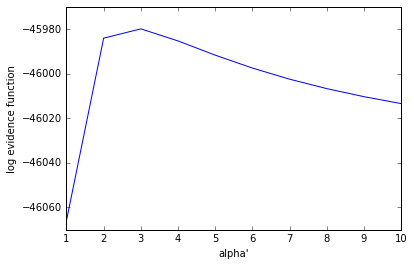

In [12]:
plt.plot(alpha_prime, log_evidence_vec)
plt.xlabel("alpha'")
plt.ylabel("log evidence function")

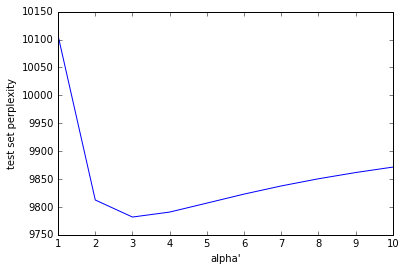

In [13]:
plt.plot(alpha_prime, test_perplexity_vec)
plt.xlabel("alpha'")
plt.ylabel("test set perplexity")

### Discussion:

* **Q:** Because we cannot use our test set for model selection, we can only use our training set. So, we can use and log evidence function for model selection. From the result, we can see that maximizing the evidence function gives the same result as minimizing the perplexity on the test set. Therefore, maximizing the evidence function is a good method for model selection on this dataset.

## Task 3: Author Identification

In [14]:
text_1 = requests.get("http://www.cs.tufts.edu/comp/136/HW/pp1files/pg84.txt.clean").text
text_2 = requests.get("http://www.cs.tufts.edu/comp/136/HW/pp1files/pg345.txt.clean").text
text_3 = requests.get("http://www.cs.tufts.edu/comp/136/HW/pp1files/pg1188.txt.clean").text

pg84 = text_1.split()
pg345 = text_2.split()
pg1188 = text_3.split()

# Build a new vocabulary for task 3
vocabulary2 = set(pg84) | set(pg345) | set(pg1188)
len(vocabulary2)

16412

In [15]:
# train the model with pg345 and test on pg84, the third number is the perplexity
compute_PP(pg84, pg345, vocabulary2)

[13101.10255864224, 8826.678364177467, 8270.715156571314]

In [16]:
# train the model with pg345 and test on pg1188, the third number is the perplexity
compute_PP(pg1188, pg345, vocabulary2)

[8486.55777395004, 6068.840388074156, 5864.369456955972]

### Discussion:

pg1188 has lower perplexity, and therefore is from the same author as pg345